# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_regression_coefs import get_regression_coefs

# Set the style for the plot and figure size

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 10)
plt.rcParams['axes.titlesize'] = 15

# A

 Data Logistics


In [4]:
# 1.Load the dataset from the Excel file
df = pd.read_excel('pwt100.xlsx', sheet_name = 'Data')

# 2.Extracting only the necessary columns from the dataset
columns_to_keep = ["countrycode", "year", "rgdpna", "pop", "emp", "rnna"]
df = df.loc[:, columns_to_keep]

# 3.Calculate real GDP per capita
df['rgdpna_pc'] = df['rgdpna'] / df['pop']

# 4.Take the natural logarithm of the real GDP per capita
df['log(rgdpna_pc)'] = np.log(df["rgdpna_pc"])

# 5.Obtain the data for Argentina
arg_df = df.loc[df["countrycode"] == "ARG"].copy()
arg_df.drop('countrycode', axis=1, inplace=True)
arg_df.reset_index(drop=True, inplace=True)
y_arg = arg_df['log(rgdpna_pc)'].copy()

# 6.Obtain the data for France
fra_df = df.loc[df["countrycode"] == "FRA"].copy()
fra_df.drop('countrycode', axis=1, inplace=True)
fra_df.reset_index(drop=True, inplace=True)
y_fra = fra_df['log(rgdpna_pc)'].copy()

Data Manipulation and Graphing - Argentina

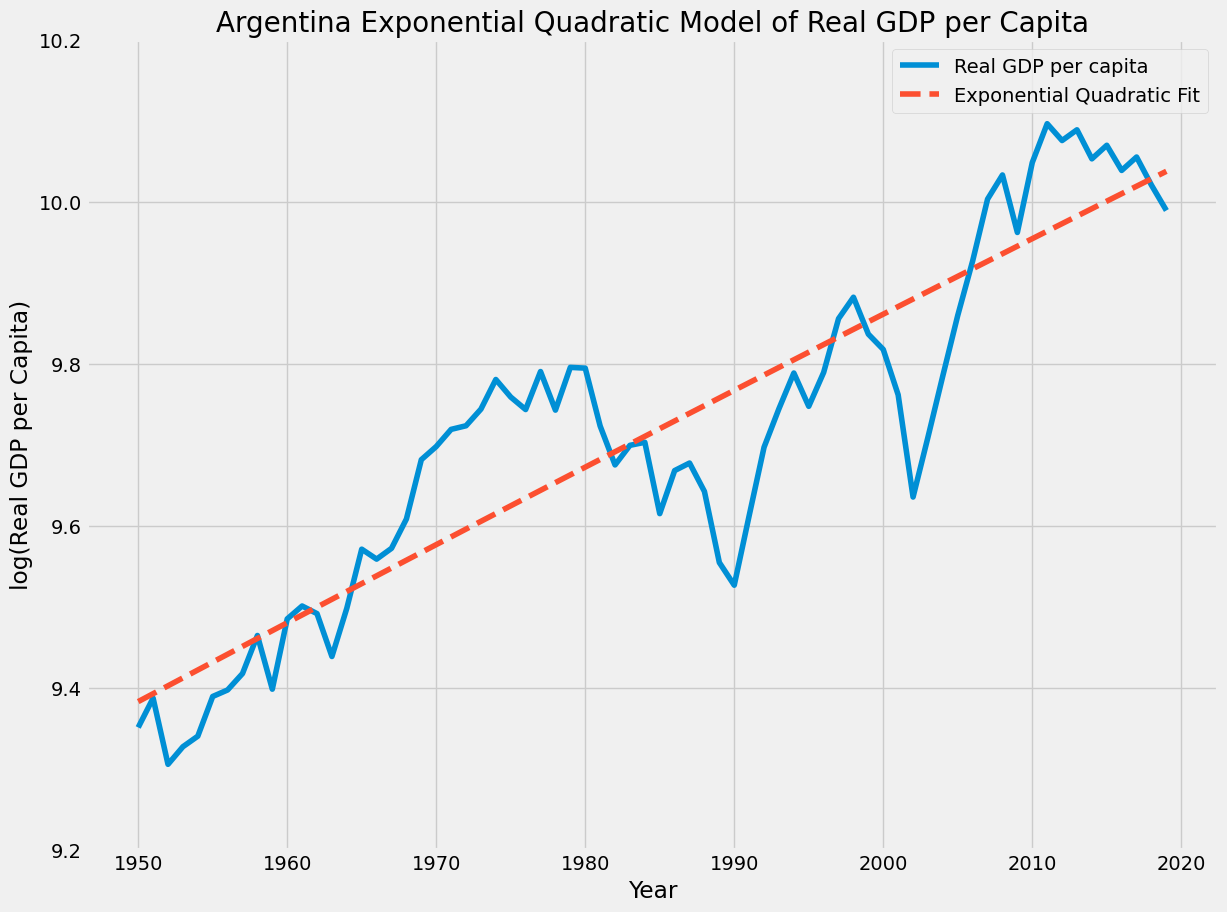

In [5]:
# Using exponential and quadratic models for Argentina
T = len(arg_df)

# Create regressors x1, x2, and x3
x1 = np.empty(T)
x2 = np.empty(T)
x3 = np.empty(T)

for t in range(T):
    x1[t] = 1.0
    x2[t] = t + 1
    x3[t] = (t + 1)**2

# Get the regression coefficients using the get_regression_coefs function
a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_arg, x1, x2, x3)

# Initialize the predicted values yhat
yhat_exp_quad_arg = np.empty(T)

# Compute the trend for all years
for t in range(T):
    yhat_exp_quad_arg[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2
    
# Plot the data and the exponential quadratic fit for Argentina
plt.plot(arg_df['year'], y_arg, label='Real GDP per capita')
plt.plot(arg_df['year'], yhat_exp_quad_arg, linestyle='dashed', label='Exponential Quadratic Fit')
plt.ylim([9.2, 10.2])
plt.title('Argentina Exponential Quadratic Model of Real GDP per Capita', size=20)
plt.xlabel('Year')
plt.ylabel('log(Real GDP per Capita)')
plt.legend()


Data Manipulation - France

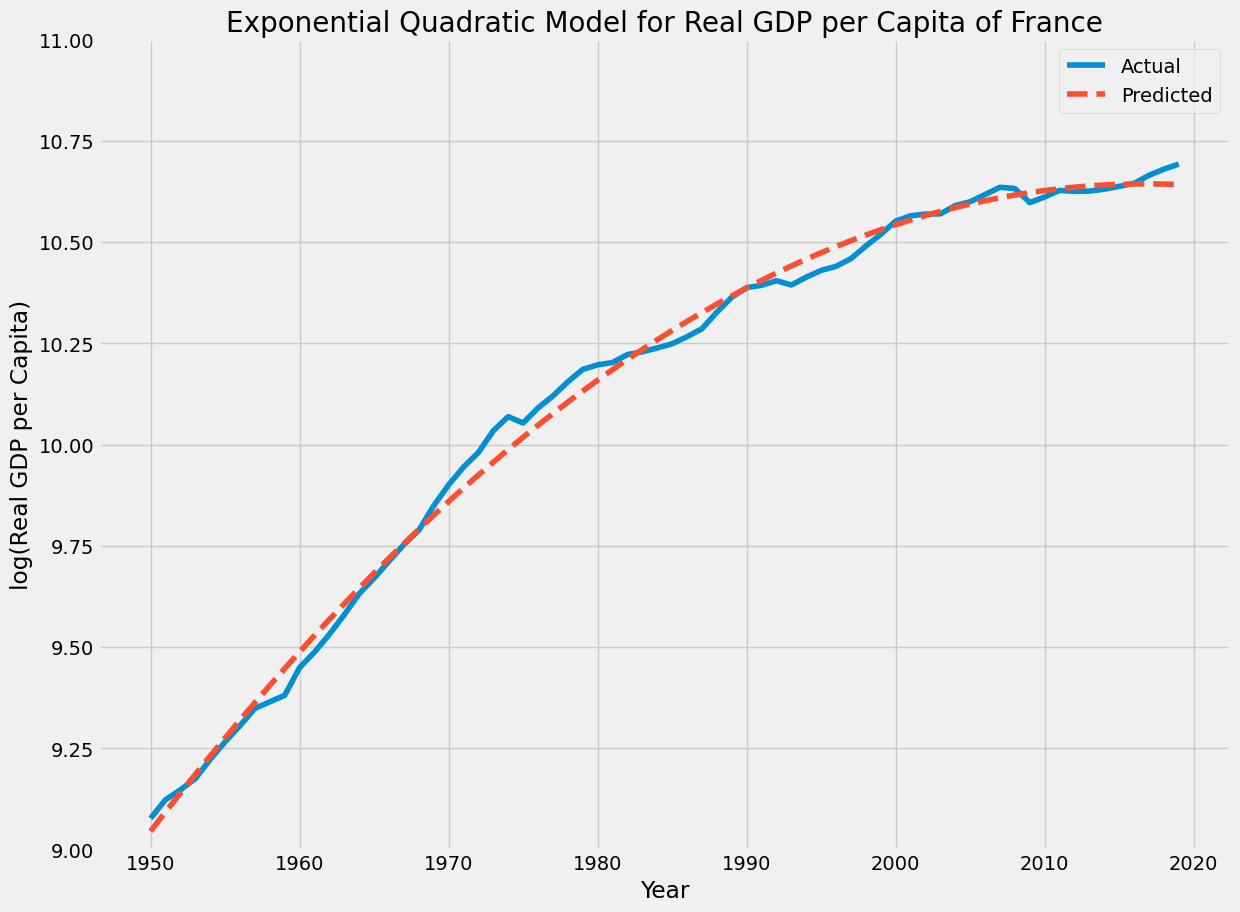

In [6]:
# Create regressors for the exponential quadratic model for France
T = len(fra_df)
x1, x2, x3 = np.empty(T), np.empty(T), np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1
    x3[t] = (t + 1)**2

# Estimate coefficients for the exponential quadratic model for France
a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_fra, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quad_fra = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad_fra[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2
    
# Plotting the actual and predicted values for France
plt.plot(fra_df['year'], fra_df['log(rgdpna_pc)'], label='Actual')
plt.plot(fra_df['year'], yhat_exp_quad_fra, linestyle='dashed', label='Predicted')
plt.ylim([9.0, 11.0])
plt.title('Exponential Quadratic Model for Real GDP per Capita of France', fontsize=20)
plt.xlabel('Year')
plt.ylabel('log(Real GDP per Capita)')
plt.legend()

# B

Cobb Douglas function: $Y=A \times L^\alpha \times K ^{1-\alpha} $

TFP is the weighted average of labour and capital input divided by output, assuming a weighting of 0.6 for labour and 0.4 for capital.

The aim is to calculate alpha

Text(0, 0.5, 'Total Factor Productivity')

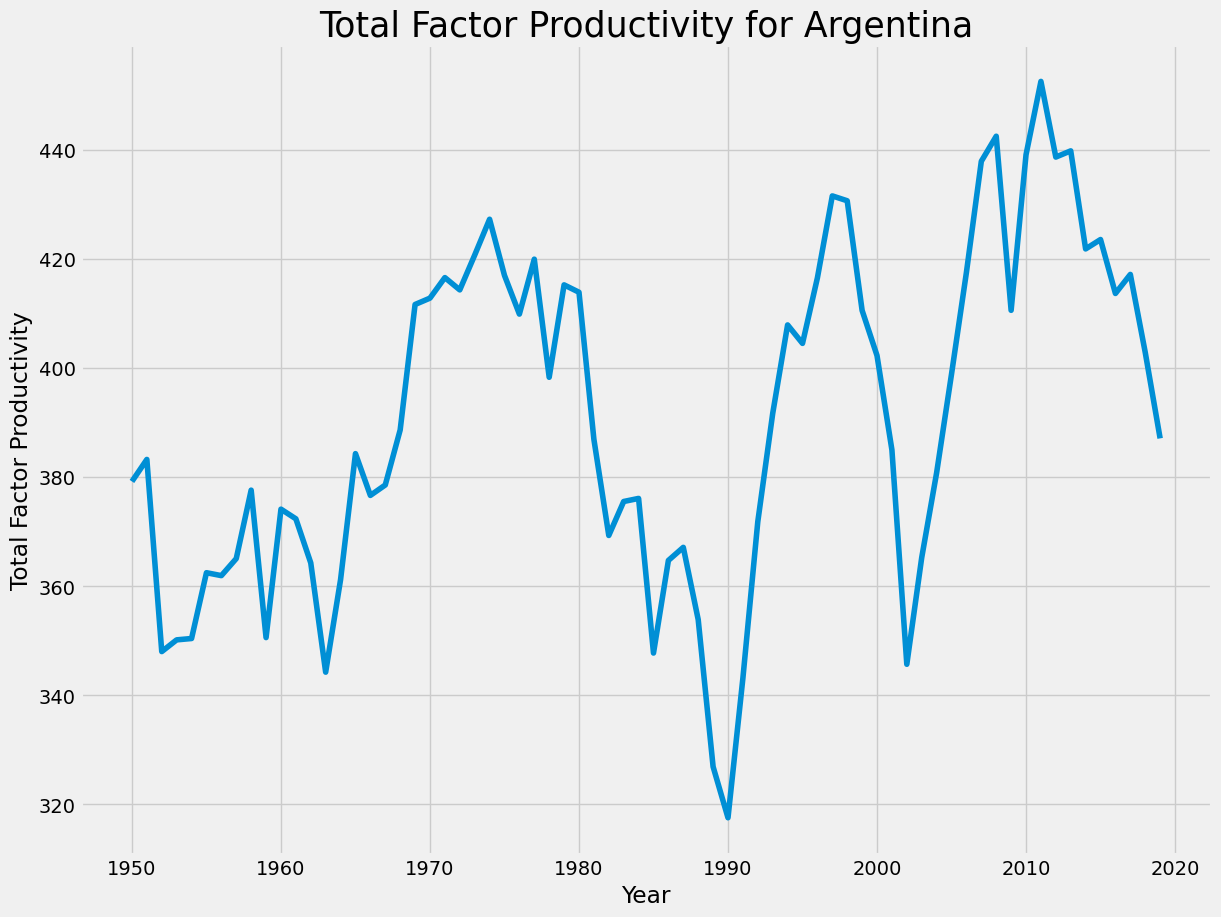

In [7]:
alpha = 0.6

# Plot TFP for Argentina
arg_df['TFP'] = arg_df['rgdpna'] / ((arg_df['emp'])**alpha * (arg_df['rnna']**(1 - alpha)))
plt.plot(arg_df['year'], arg_df['TFP'])
plt.title('Total Factor Productivity for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

Text(0, 0.5, 'Total Factor Productivity')

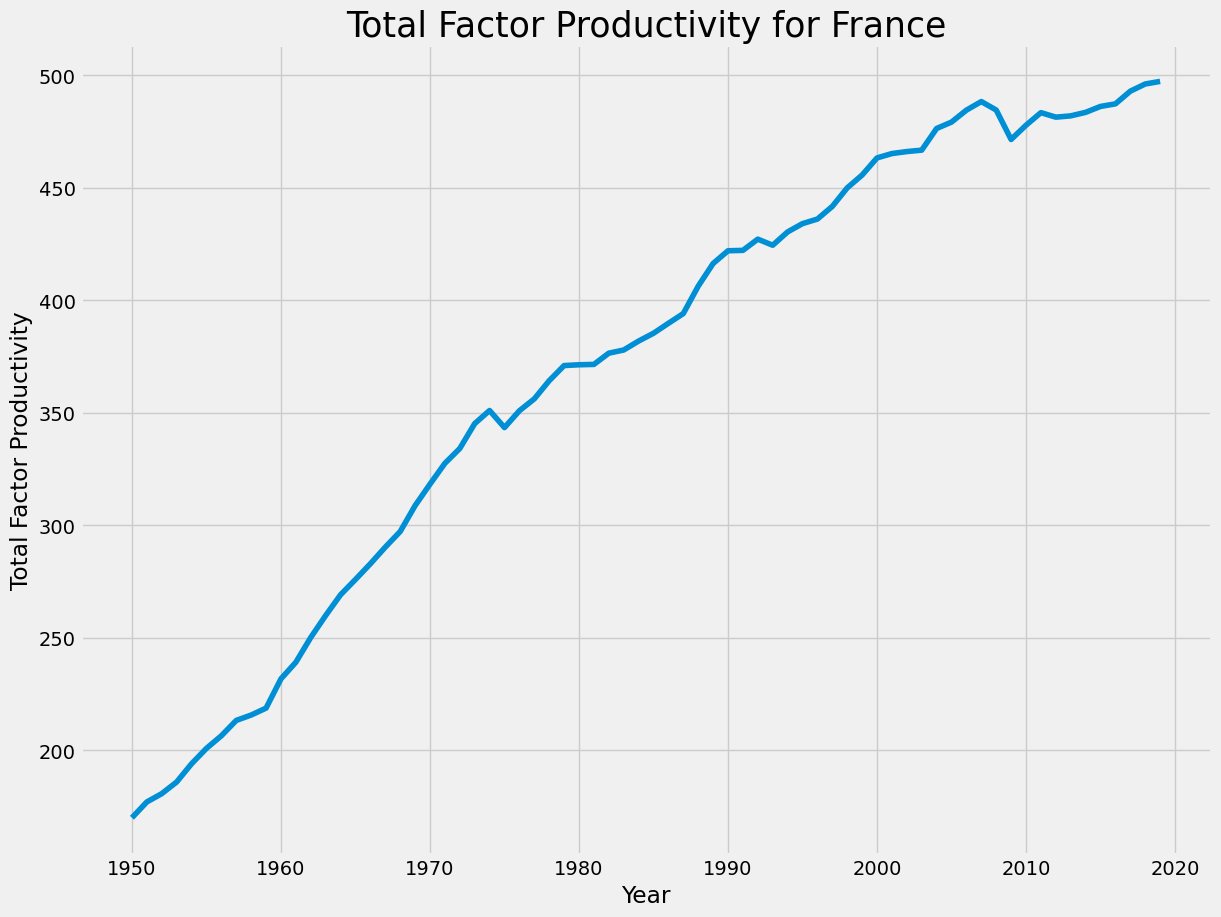

In [8]:
# Plot TFP for France
fra_df['TFP'] = fra_df['rgdpna'] / ((fra_df['emp'])**alpha * (fra_df['rnna']**(1 - alpha)))
plt.plot(fra_df['year'], fra_df['TFP'])
plt.title('Total Factor Productivity for France', size = 25)
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

# C

In [9]:
# Calculate the growth contribution
T = arg_df.shape[0]
arg_dlog_y = np.empty(T-1)
arg_dlog_A = np.empty(T-1)
arg_dlog_k = np.empty(T-1)
arg_dlog_l = np.empty(T-1)
for t in range(T-1):
    arg_dlog_y[t] = np.log(arg_df['rgdpna'][t+1]) - np.log(arg_df['rgdpna'][t])
    arg_dlog_A[t] = np.log(arg_df['TFP'][t+1]) - np.log(arg_df['TFP'][t])
    arg_dlog_k[t] = np.log(arg_df['rnna'][t+1]) - np.log(arg_df['rnna'][t])
    arg_dlog_l[t] = np.log(arg_df['emp'][t+1]) - np.log(arg_df['emp'][t])
arg_contr_TFP = arg_dlog_A / arg_dlog_y
arg_contr_k = ((1 - alpha) * arg_dlog_k) / arg_dlog_y
arg_contr_l = (alpha * arg_dlog_l) / arg_dlog_y

# Print table of growth contribution for Argentina
print('Argentina')
data = {'Growth Y' : arg_dlog_y, 'Growth TFP' : arg_dlog_A,
        'Growth K' : arg_dlog_k, 'Growth L' : arg_dlog_l,
        'TFP Component' : arg_contr_TFP,
        'K Component' : arg_contr_k,
        'L Component' : arg_contr_l}
arg_growth_df = pd.DataFrame(data = data, index = [str(1950 + x) + "-" + str(1951 + x) for x in range(T-1)])
arg_growth_df.index.name = "Time Period"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(arg_growth_df.iloc[:, 4:])

Argentina
             TFP Component  K Component  L Component
Time Period                                         
1950-1951         0.184442     0.651646     0.163913
1951-1952         1.570512    -0.417345    -0.153167
1952-1953         0.149082     0.623354     0.227564
1953-1954         0.021956     0.684494     0.293550
1954-1955         0.501457     0.359232     0.139311
1955-1956        -0.056684     0.747820     0.308864
1956-1957         0.228159     0.558632     0.213209
1957-1958         0.528502     0.345785     0.125713
1958-1959         1.496835    -0.334872    -0.161963
1959-1960         0.630374     0.291678     0.077947
1960-1961        -0.148208     0.911903     0.236305
1961-1962        -3.443037     3.256561     1.186476
1962-1963         1.512060    -0.309797    -0.202263
1963-1964         0.642769     0.256136     0.101095
1964-1965         0.704757     0.209257     0.085986
1965-1966        -8.542575     6.440774     3.101801
1966-1967         0.184110     0.549

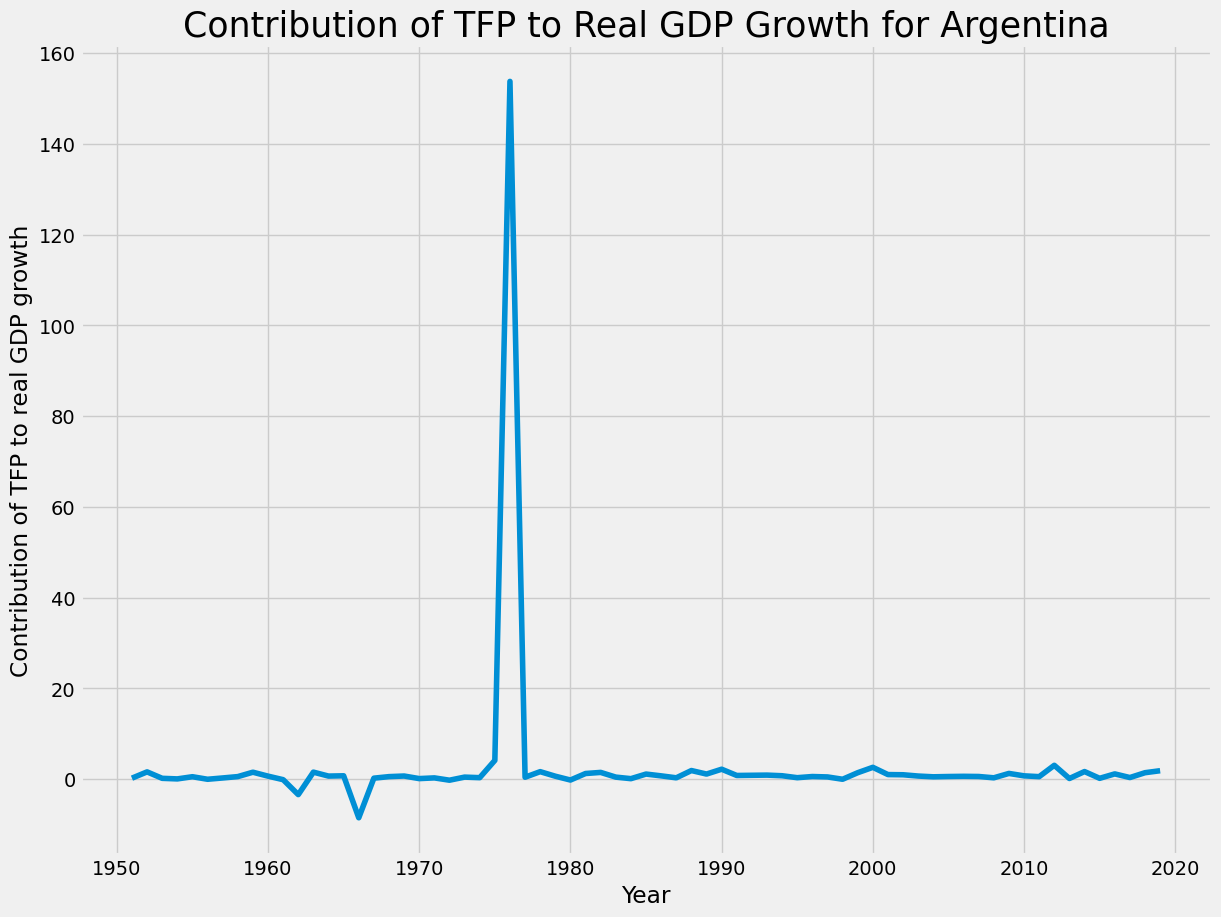

In [10]:
# Plot the contribution of TFP, capital, and labor for Argentina
plt.plot([1951 + i for i in range(T-1)], arg_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')
plt.show()

Text(0.5, 0, 'Year')

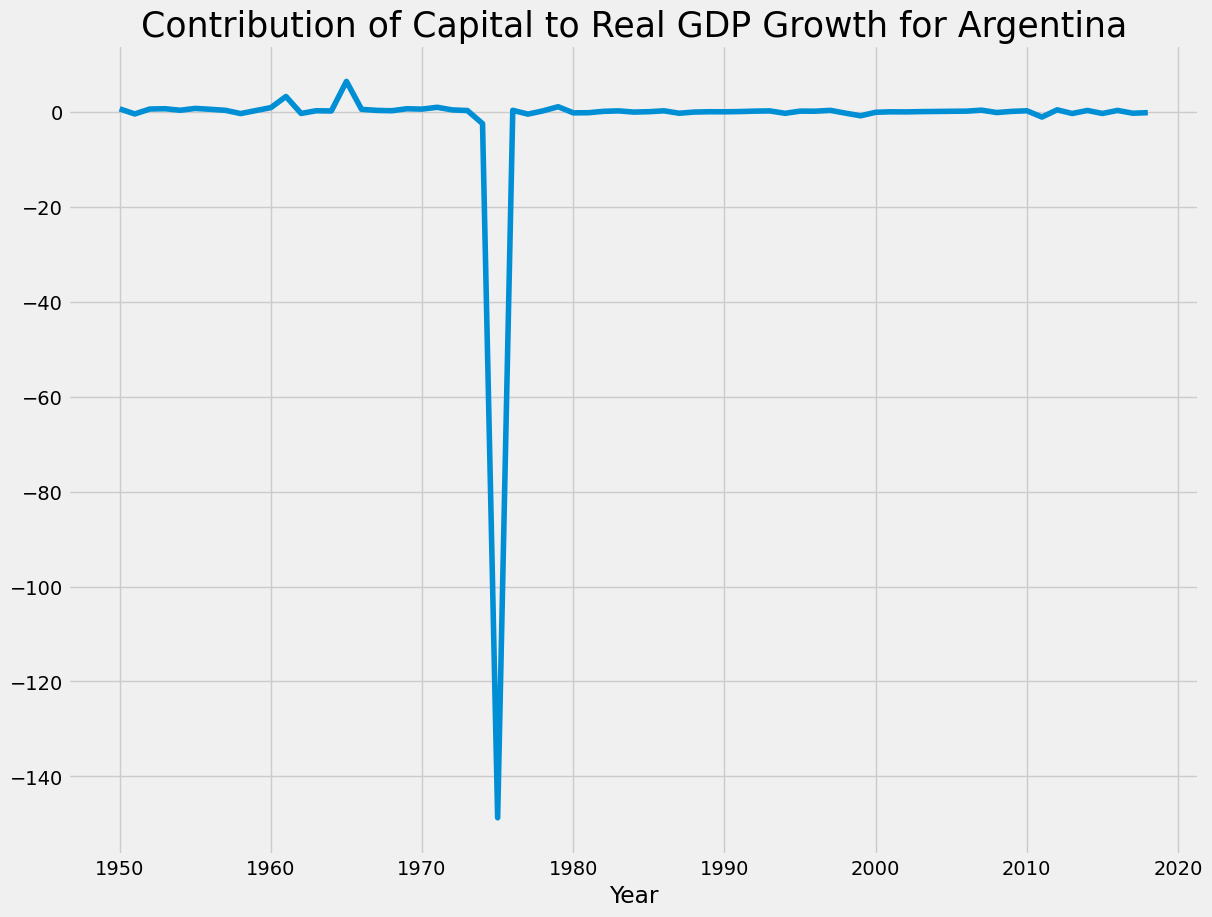

In [11]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')

Text(0, 0.5, 'Contribution of Capital to real GDP growth')

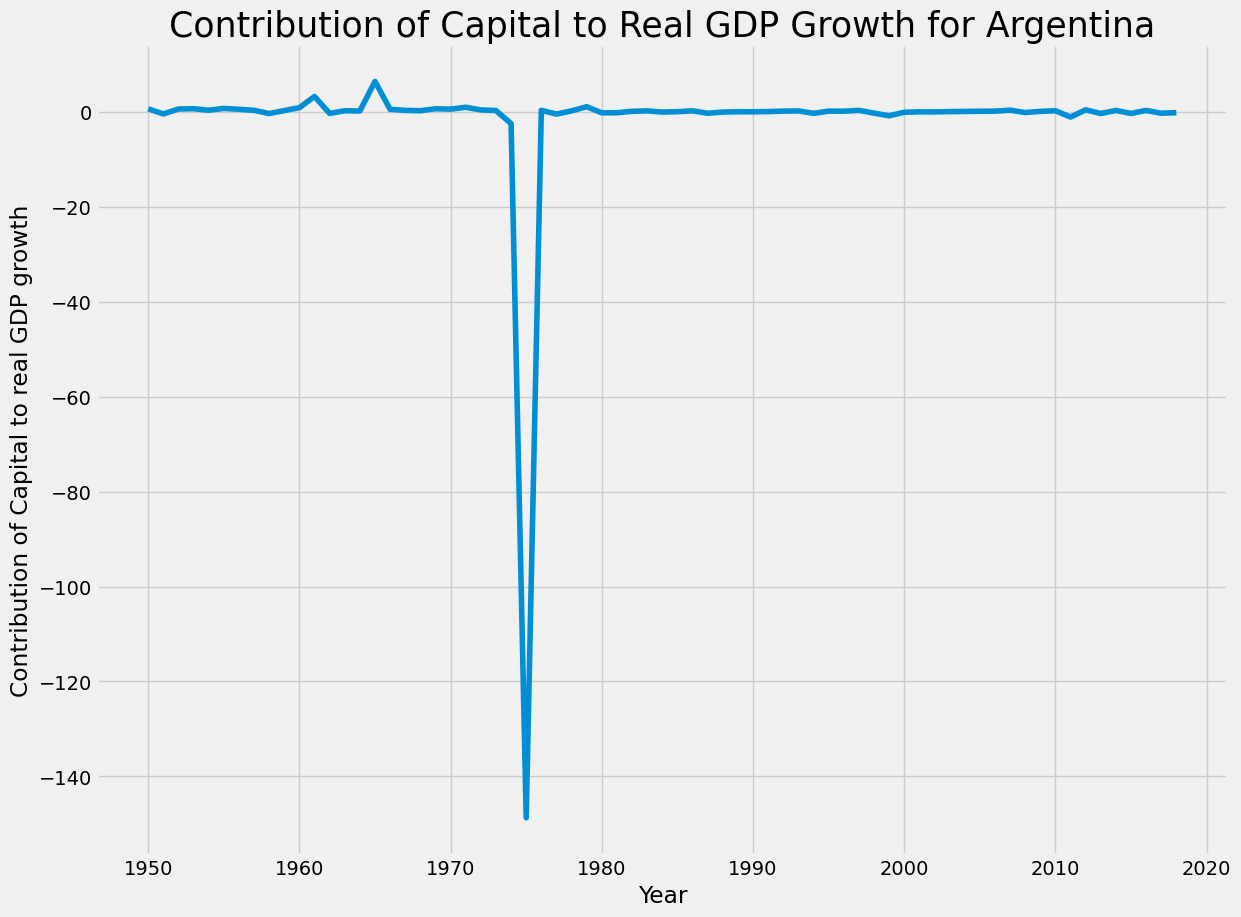

In [20]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Capital to real GDP growth')

Text(0, 0.5, 'Percentage Change')

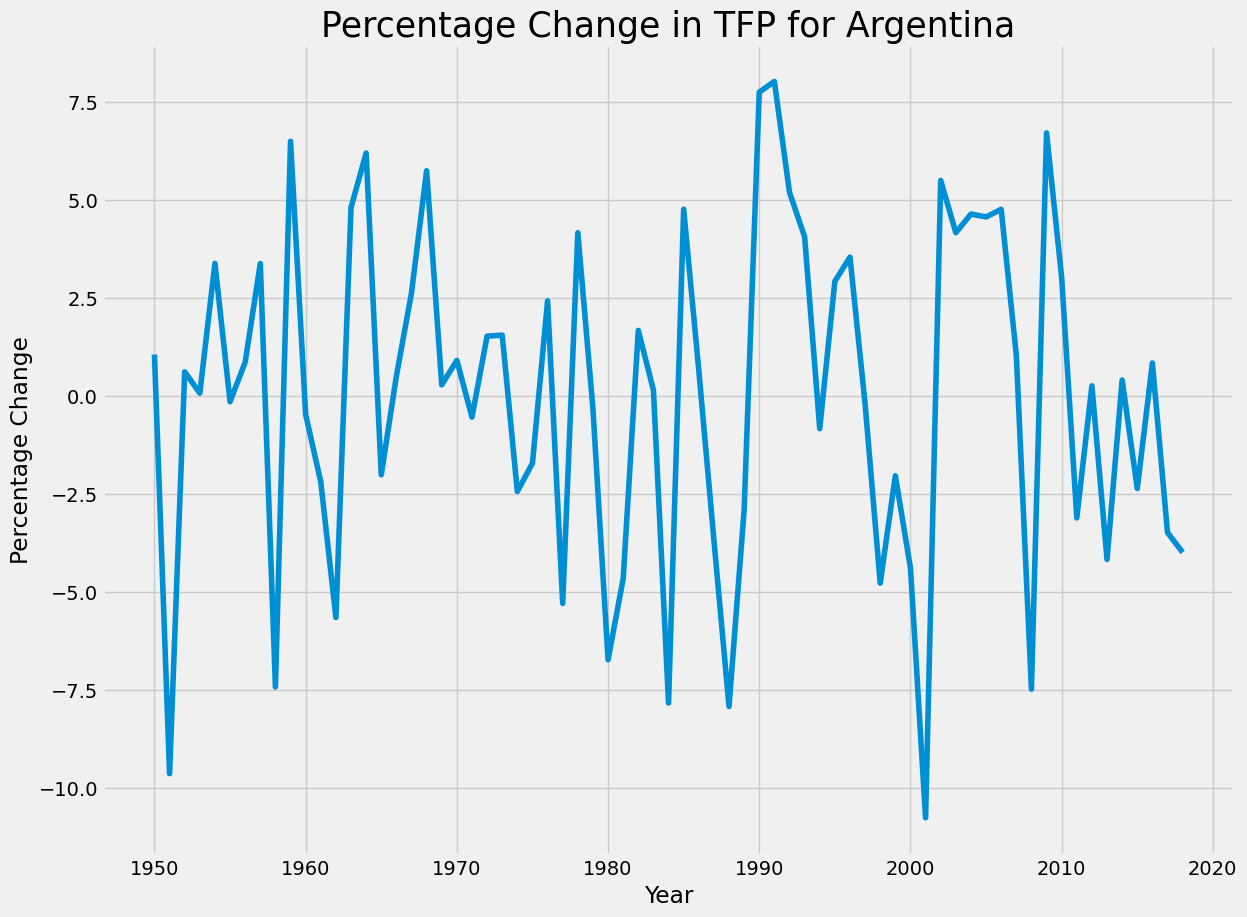

In [22]:
plt.plot([1950 + i for i in range(T-1)], arg_dlog_A*100)
plt.title('Percentage Change in TFP for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

In [12]:
T = arg_df.shape[0]
fra_dlog_y = np.empty(T-1)
fra_dlog_A = np.empty(T-1)
fra_dlog_k = np.empty(T-1)
fra_dlog_l = np.empty(T-1)
for t in range(T-1):
    fra_dlog_y[t] = np.log(fra_df['rgdpna'][t+1]) - np.log(fra_df['rgdpna'][t])
    fra_dlog_A[t] = np.log(fra_df['TFP'][t+1]) - np.log(fra_df['TFP'][t])
    fra_dlog_k[t] = np.log(fra_df['rnna'][t+1]) - np.log(fra_df['rnna'][t])
    fra_dlog_l[t] = np.log(fra_df['emp'][t+1]) - np.log(fra_df['emp'][t])
fra_contr_TFP = fra_dlog_A / fra_dlog_y
fra_contr_k = ((1 - alpha) * fra_dlog_k) / fra_dlog_y
fra_contr_l = (alpha * fra_dlog_l) / fra_dlog_y

# print table of growth contributions
print('France')
data = {'Growth Y' : fra_dlog_y, 'Growth TFP' : fra_dlog_A,
        'Growth K' : fra_dlog_k, 'Growth L' : fra_dlog_l,
        'TFP Component' : fra_contr_TFP,
        'K Component' : fra_contr_k,
        'L Component' : fra_contr_l}

fra_growth_df = pd.DataFrame(data = data, index = [str(1950 + x) + "-" + str(1951 + x) for x in range(T-1)])
fra_growth_df.index.name = "Time Period"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fra_growth_df.iloc[:, 4:])

France
             TFP Component  K Component  L Component
Time Period                                         
1950-1951         0.749434     0.174677     0.075889
1951-1952         0.644126     0.279606     0.076269
1952-1953         0.814510     0.250232    -0.064742
1953-1954         0.770918     0.207148     0.021934
1954-1955         0.662428     0.248366     0.089206
1955-1956         0.551856     0.297283     0.150862
1956-1957         0.607389     0.307218     0.085393
1957-1958         0.408698     0.644824    -0.053522
1958-1959         0.534924     0.587441    -0.122365
1959-1960         0.737878     0.249117     0.013005
1960-1961         0.628836     0.375943    -0.004779
1961-1962         0.699359     0.308111    -0.007470
1962-1963         0.609126     0.319809     0.071065
1963-1964         0.550768     0.348767     0.100465
1964-1965         0.525074     0.436172     0.038754
1965-1966         0.488485     0.421336     0.090179
1966-1967         0.529651     0.435976

Text(0, 0.5, 'Contribution of TFP to real GDP growth')

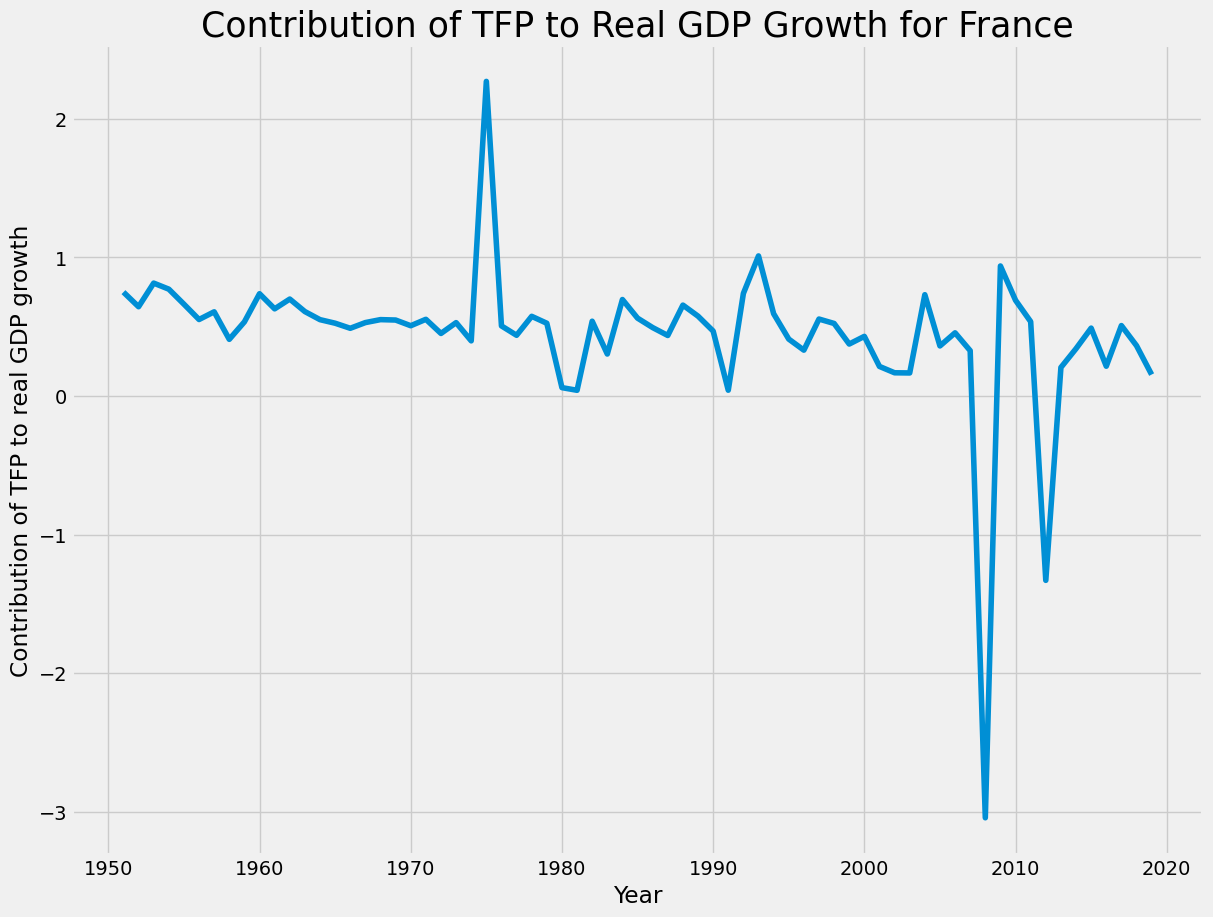

In [15]:
# plot contributions
plt.plot([1951 + i for i in range(T-1)], fra_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')

Text(0, 0.5, 'Contribution of Capital to real GDP growth')

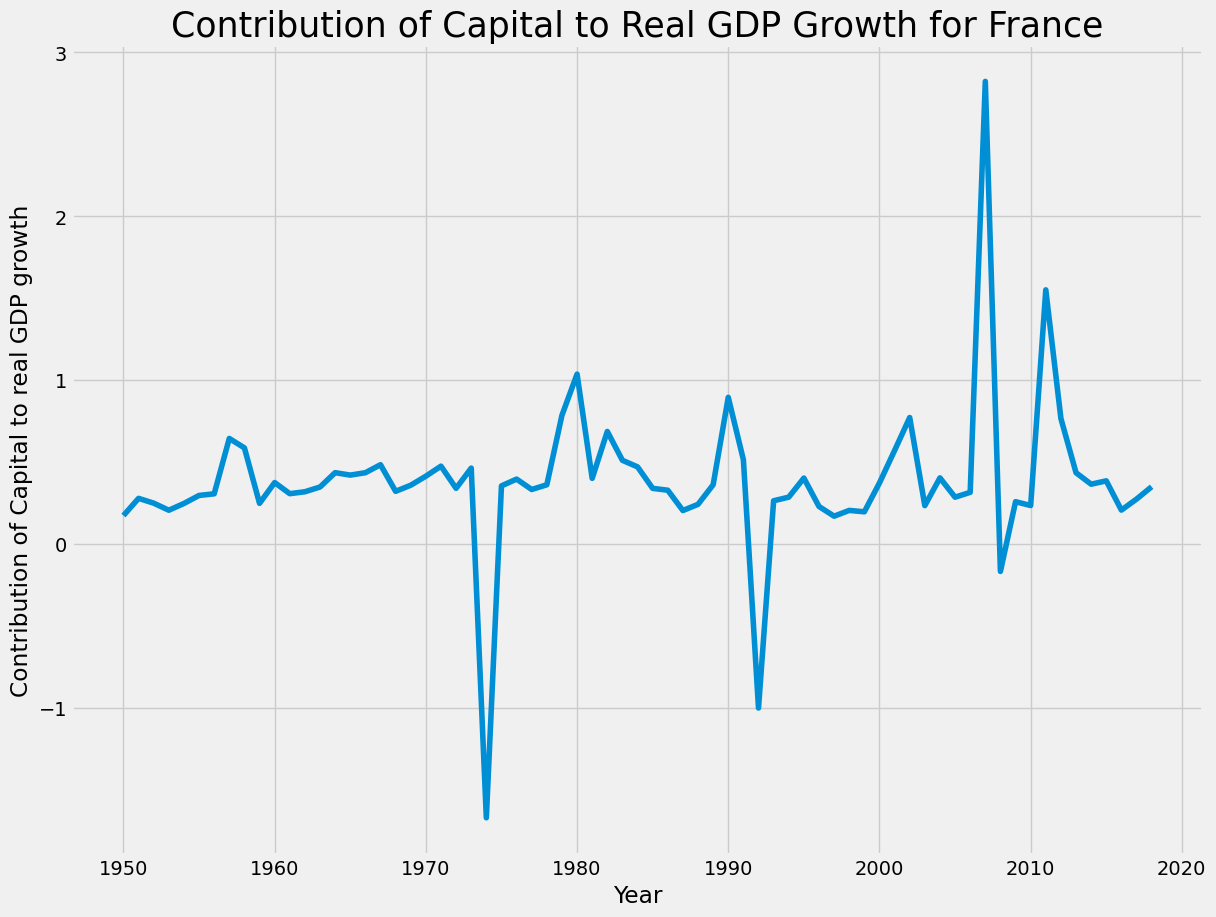

In [16]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Capital to real GDP growth')

Text(0, 0.5, 'Contribution of Labour to real GDP growth')

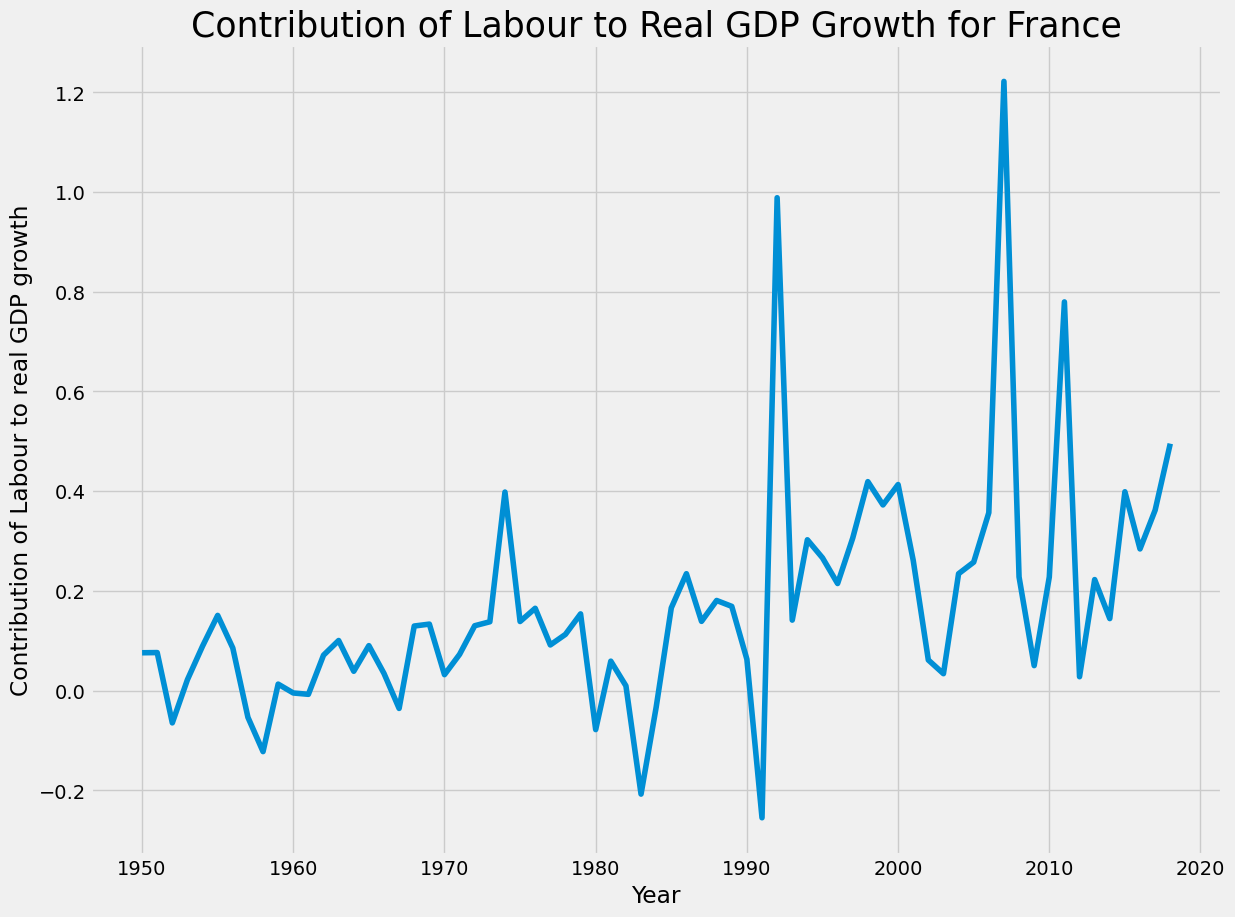

In [17]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_l)
plt.title('Contribution of Labour to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

Text(0, 0.5, 'Percentage Change')

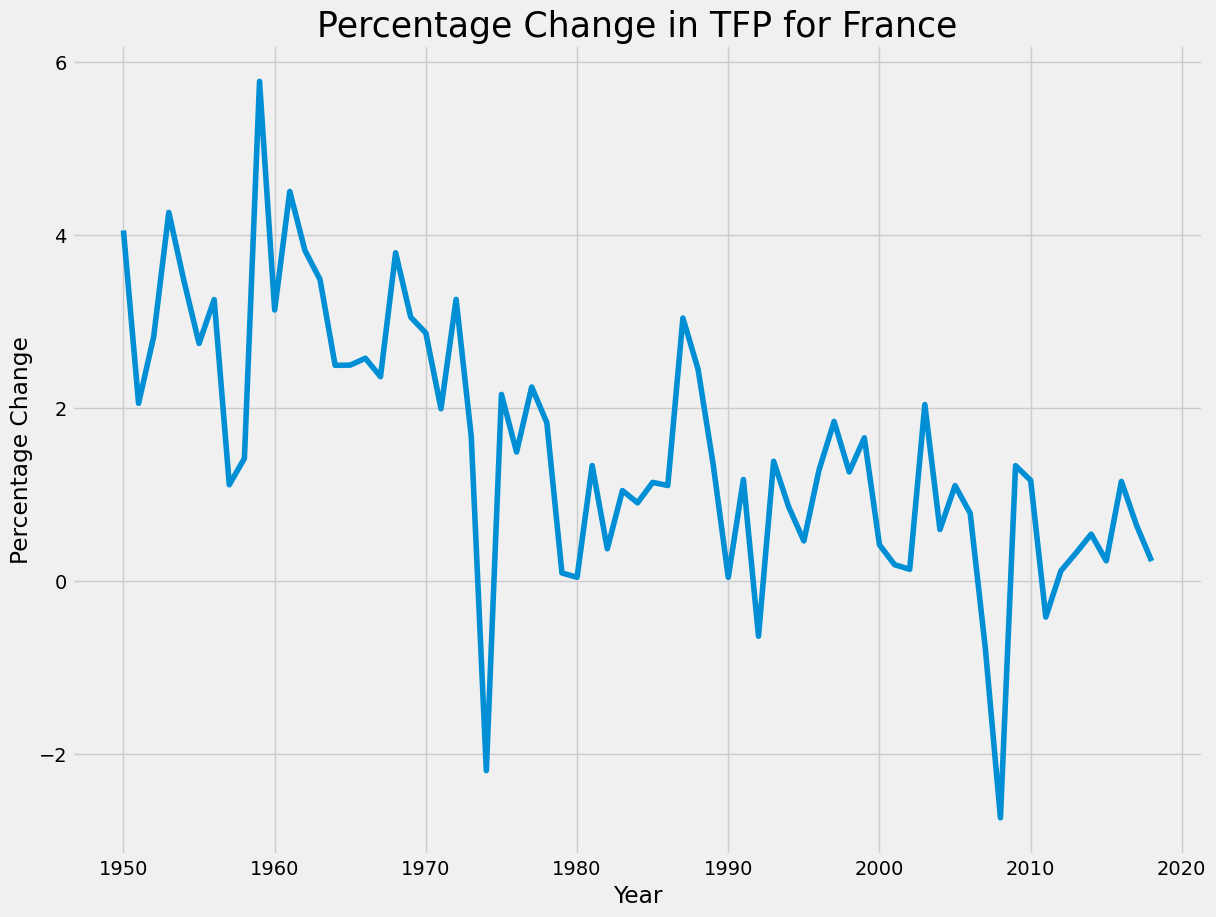

In [21]:
plt.plot([1950 + i for i in range(T-1)], fra_dlog_A*100)
plt.title('Percentage Change in TFP for France', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')